In [1]:
!pip install kaggle
!mkdir .kaggle

In [5]:
import json
token = {"username":"fatemehy","key":"e6177841494493a99d3da8b61bab2fb1"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

- path is now set to: {/content}
ref                                                             title                                                size  lastUpdated          downloadCount  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge               COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-10 00:09:23           3258  
roche-data-science-coalition/uncover                            UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53           3303  
kwullum/fatal-police-shootings-in-the-us                        Fatal Police Shootings in the US                      1MB  2017-09-22 19:18:21          15571  
Cornell-University/arxiv                                        ArXiv Metadata                                        2GB  2020-05-06 23:18:35             77  
sudalai

In [6]:
!kaggle datasets list -s wholesale
!kaggle datasets download -d binovi/wholesale-customers-data-set    -p /content
!unzip \*.zip

ref                                                             title                                              size  lastUpdated          downloadCount  
--------------------------------------------------------------  -----------------------------------------------  ------  -------------------  -------------  
irinachuchueva/russian-wholesale-electricity-market             Russian Wholesale Electricity Market                1MB  2020-03-03 20:12:28            139  
binovi/wholesale-customers-data-set                              Wholesale customers Data Set                       7KB  2018-04-11 14:32:40           1919  
census/total-merchant-wholesalers-inventory-and-sales           Total Merchant Wholesalers Inventory and Sales      8KB  2019-12-06 09:14:41            208  
census/merchant-wholesalers-inventories-data                    Merchant Wholesalers Inventories Data              17KB  2019-12-07 01:02:26            100  
new-york-state/nys-liquor-authority-brand-label-and-

In [7]:
# Load data into Pandas Dataframe
import pandas as pd
df = pd.read_csv('Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [9]:
#Does the dataset include any missing values? If so, delete the missing values entries
df.isnull().sum(axis = 0)
df=df.drop(['Channel','Region'],axis=1)

In [10]:
#Preprocessing
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# encoder.fit(df['diagnosis'])
# df['diagnosis']= encoder.transform(df['diagnosis'])

df.dropna()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


cluster centers:  [[-5.69863454e-01 -5.75153588e-01 -6.44369287e-01 -3.85799868e-01
  -5.28144136e-01 -3.47985947e-01]
 [-3.35495522e-01 -5.49438594e-01 -6.33018687e-01  5.48795407e-01
  -5.28851114e-01 -3.41264561e-01]
 [-6.45584118e-01  9.94124871e-02  2.25029033e-01 -4.54250790e-01
   2.75049900e-01 -7.51193970e-02]
 [-7.28309592e-01 -1.95546490e-01 -1.22928077e-01 -5.04259518e-01
   4.28576745e-02 -2.44549182e-01]
 [ 3.19344115e-01 -5.26607982e-03 -2.25736620e-02 -3.65479283e-01
  -1.07891592e-01  3.03452866e-01]
 [ 1.70921690e-02 -5.15847651e-01 -5.66707302e-01  9.11673747e-01
  -5.20985737e-01 -1.55404675e-01]
 [-7.83380749e-01  4.81019309e-01  4.22146670e-01 -5.17647880e-01
   4.97867833e-01 -1.42348555e-01]
 [-7.67078582e-01 -3.46716958e-02  3.20965859e-01 -5.44479596e-01
   7.34394911e-01 -6.21382213e-02]
 [ 2.33091283e+00 -5.93471846e-01 -6.09298290e-01 -3.70277371e-01
  -5.17654107e-01 -2.62725194e-01]
 [ 3.11067698e-01 -2.46808120e-01 -7.33724222e-02 -4.90834495e-01
   1.36

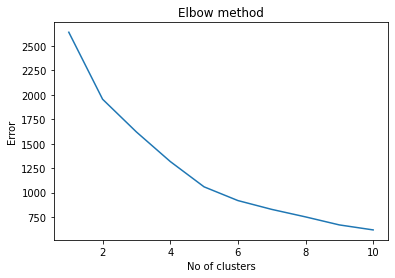

In [27]:
X=df
# from sklearn.preprocessing import OneHotEncoder
# encoded_X = OneHotEncoder().fit_transform(X).toarray()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
encoded_X = scaler.fit_transform(df)

from sklearn.cluster import MeanShift
# From sklearn.cluster import MeanShift
mean_shift= MeanShift(bandwidth = 0.5)
mean_shift.fit(encoded_X)
Clusters = mean_shift.predict(encoded_X) 
print('cluster centers: ',mean_shift.cluster_centers_)
print('clusters: ',clusters[0:5])

from sklearn.cluster import KMeans
clusters2 = KMeans(n_clusters=5, tol=1e-5, random_state=0).fit_predict(encoded_X)
print(clusters2[0:5])



# ###elbow method
# import matplotlib.pyplot as plt
# Sum_of_squared_distances = []
# K = range(1,30)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(encoded_X)
#     Sum_of_squared_distances.append(km.inertia_)
#     print('k:', k)
#     print('inertia: ',km.inertia_)
# print(K)
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(encoded_X)
    kmeans.fit(encoded_X)
    Error.append(kmeans.inertia_)
    print('i:', i)
    print('inertia: ',kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()
